<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 Examples of Numerical Problem Calculations

Hywel Owen  
(c) University of Manchester  
16th May 2020

As usual, we first initialise our Python interpreter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Numerical Precision in Python Calculations

When we do a numerical calculation in our (favourite) programming language, we initially don't really worry about what form our numbers are being processed in. Here, we are implicitly using integers without worrying much about them:

In [2]:
x = 10
for i in range (20):
    x = (x-9)*10
    print(x)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


We can explicitly check what form **x** has ended up as. Yes, it is an integer:

In [3]:
type(x)

int

Let's now do the same calculation, but explicitly with floating point numbers:

In [4]:
x = 10.0
for i in range (20):
    x = (x-9.0)*10.0
    print(x)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


Everything looks much the same, except that of course we see a decimal point after the number that indicates this time we have a floating-point variable. We can explicitly confirm this is the case:

In [5]:
type(x)

float

Now, we do the same calculation. At least, it looks similar enough. However, a problem emerges:

In [10]:
x = 1.0
for i in range (20):
    x = (x-0.9)/0.1
    print(x)

0.9999999999999998
0.9999999999999976
0.9999999999999754
0.9999999999997533
0.9999999999975329
0.9999999999753284
0.9999999997532838
0.9999999975328377
0.9999999753283773
0.9999997532837723
0.9999975328377231
0.9999753283772306
0.9997532837723055
0.9975328377230552
0.9753283772305521
0.7532837723055208
-1.4671622769447923
-23.67162276944792
-245.7162276944792
-2466.1622769447918


What has happened here? We can see that this calculation is steadily giving a greater and greater error. About 1 digit of accuracy is being lost at each *iteration* of the calculation.

What is happening? Let's try to look at this. First, we define a variable *y*:

In [1]:
y = 0.1
print(y)

0.1


So far, so good. But let's now explicitly display the number to greater precision, using the *format* command:

In [2]:
print('y = {:04.10f}'.format(y))

y = 0.1000000000


Seems okay so far. Let's look with even more precision:

In [3]:
print('y = {:04.30f}'.format(y))

y = 0.100000000000000005551115123126


Ahaa... Even though we have asked for the value **0.1** to be stored, Python has stored something slightly different. This is because Python (and most other languages) store floating numbers using a *binary* representation. And the number **0.1** cannot be represented in binary in closed form (i.e. the representation repeats forever).

This leads to some interesting issues. For example, let's compare two expressions. **0.1 + 0.1 + 0.1** should equal **0.3**, but using our internal binary representation it doesn't quite:

In [4]:
0.1 + 0.1 + 0.1 == 0.3

False

We should therefore be careful when comparing numbers with each other.

Although it's a bit tricky to display numbers in their equivalent binary format, Python lets us do something similar, which is to look at the hexadecimal representation of a variable. This is done using the **.hex()** method of a variable. (You may not have realised yet that variables can have methods, but in Python they can).

In [6]:
y.hex()

'0x1.999999999999ap-4'

Again, we see that 0.1 cannot be represented by a *terminating* series of digits. And so there is a small difference between the stored value **y** and the value **0.1** that we originally wanted to store.

Not all decimals have this problem, of course. For example, the number **0.5** *does* have a closed for representation in Python:

In [12]:
z = 0.5
z.hex()

'0x1.0000000000000p-1'

...and so does **0.25** (look closely at the power exponent at the end of the number)

In [26]:
z = 0.25
z.hex()

'0x1.0000000000000p-2'

It can be very useful to have an idea of the precision with which numbers can be stored in Python. For ordinary floating-point numbers (commonly called double precision), we can get that precision in Python using **np.spacing()**:

In [28]:
np.spacing(1)

2.220446049250313e-16

![](img/bee.png)
## Some Other Problems With Numerical Precision Limits

The fact that there is a numerical precision limit means we sometimes have to be careful with how we structure our calculations. One example is when we add a very small number to a larger number. A catastrophic error can occur:

In [13]:
# Round-off error
1e-20/((3+1e-20)-3)

ZeroDivisionError: float division by zero

This problem can show itself in several ways. Here, we plot a 'regular' function **y=f(x)=x**:

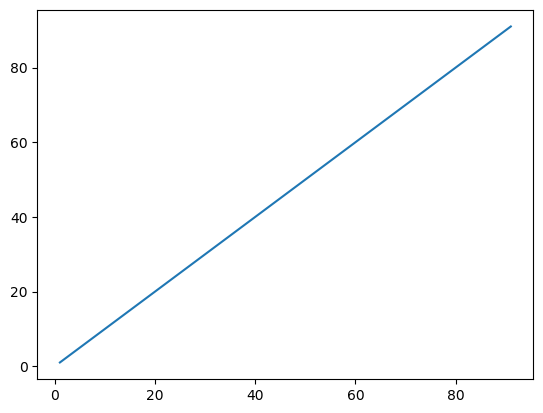

In [14]:
x = np.arange(1,100,10)
y = x
plt.plot(x,y)

Everything looks fine. But let's now plot something that looks almost the same:

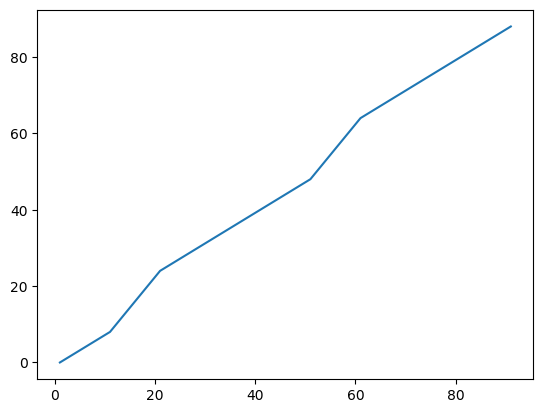

In [15]:
x = np.arange(1,100,10)
y = 6e16+x-6e16
plt.plot(x,y)

Something odd is happening.

This example is 'faked', but hopefully you can see situations where you are calculating some very small changes in **x** (say, atomic distances), and then displaying some resultant effect (say, what the forces are).

Let's make this a bit more obvious by plotting more points (we now plot 100 points instead of 10):

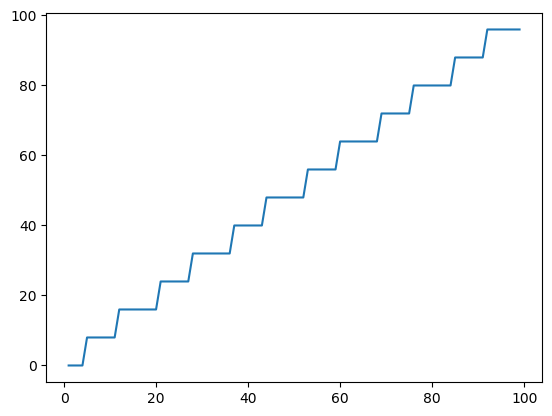

In [14]:
x = np.arange(1,100,1)
y = 6e16+x-6e16
plt.plot(x,y)

We see that **(6e16+x)** cannot be represented to a great enough accuracy because of the large (**6e16**) value, which has the effect of truncating the values of **x** effectively to steps of some (binary) size. We can see that more clearly by printing them out explicitly:

In [15]:
print(y)

[ 0.  0.  0.  0.  8.  8.  8.  8.  8.  8.  8. 16. 16. 16. 16. 16. 16. 16.
 16. 16. 24. 24. 24. 24. 24. 24. 24. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 40. 40. 40. 40. 40. 40. 40. 48. 48. 48. 48. 48. 48. 48. 48. 48. 56. 56.
 56. 56. 56. 56. 56. 64. 64. 64. 64. 64. 64. 64. 64. 64. 72. 72. 72. 72.
 72. 72. 72. 80. 80. 80. 80. 80. 80. 80. 80. 80. 88. 88. 88. 88. 88. 88.
 88. 96. 96. 96. 96. 96. 96. 96. 96.]


![](./img/bee.png)
## Definining and Displaying Numbers

Here are a few hints and tricks for making it easier to display numbers. First, you may have already noticed that very long numbers can be hard to read.  

### Displaying Long Numbers

In [1]:
c = 299792458 # Speed of light in m/s

This is quite hard to read. We can put a comma between the digits (that's how a list is written!), but we *are* allowed to put underscores in:

In [3]:
c = 299_792_458 # Speed of light in m/s
print(c)

299792458


This can make it a *lot* easier when we are defining variables with lots of zeroes in them:

In [4]:
onetrillion = 1_000_000_000_000
print(onetrillion)

1000000000000


That number would be really hard to check if there were no underscores.

But what about printing numbers in a more readable way? We already saw the **format** command that lets us display numbers in a concise way:

In [8]:
print('Pi is approximately = {:04.04f}'.format(3.14159268))

Pi is approximately = 3.1416


We can write this in a slightly more concise way as:

In [13]:
print(f'Pi is approximately = {3.14159628:04.04f}')

Pi is approximately = 3.1416


We can use the same **syntax** to display our big number with commas in it:

In [14]:
print(f'One trillion is = {onetrillion:,}')

One trillion is = 1,000,000,000,000


or just:

In [15]:
print(f'{onetrillion:,}')

1,000,000,000,000


I quite like this last way, which is handy when used in programs.

### Formatting Floating-Point Numbers

We often want to display numerical values with our own formatting - for example, limiting the number of decimal points displayed. The following are a few examples for you to see what formatting is possible.

In [36]:
value_a = 123.45678
error_a = 0.123456
print('Value a = {:04.2f}'.format(value_a)) # Formatting a single value
print(f'Value a = {value_a:04.2f}') # Another way of doing the same thing
print('Error a = {:04.4f}'.format(error_a)) # Changing the number of decimal points displayed

print('a = {:04.4f} +/- {:04.4f}'.format(value_a,error_a)) # Showing two values
print(f'a = {value_a:04.4f} +/- {error_a:04.4f}') # Another way of doing the same thing

print(f'a = {value_a:04.4f} \u00b1 {error_a:04.4f}') # Putting unicode characters into the output

print('\u0061 \u0062 \u0063 \u0064 \u0065') # Putting basic unicode characters in

print('\u263a \u265e') # Displaying basic unicode
print('\U0001F600\U0001F601\U0001F602\U0001F603\U0001F604') # Displaying more complex unicode!

Value a = 123.46
Value a = 123.46
Error a = 0.1235
a = 123.4568 +/- 0.1235
a = 123.4568 +/- 0.1235
a = 123.4568 ± 0.1235
a b c d e
☺ ♞
😀😁😂😃😄


Let's look a little more closely at that. It turns out that in Python that there are 3 methods to print formatted numbers. The 'old-fashioned' method is using the **%** character:

In [42]:
a = 1.23456
b = 2.34567
print('a = %4.4f and b = %4.4f' % (a,b))

a = 1.2346 and b = 2.3457


This is fine, but gets hard to read if there are lots of variables. The next method is the **format** method we saw earlier:

In [46]:
a = 1.23456
b = 2.34567
print('a = {:4.4f} and b = {:4.4f}'.format(a,b))

a = 1.2346 and b = 2.3457


Actually, we can re-order the arguments if we want to (although it can turn out to be quite confusing!):

In [47]:
a = 1.23456
b = 2.34567
print('b = {1:4.4f} and a = {0:4.4f}'.format(a,b))

b = 2.3457 and a = 1.2346


In [48]:
a = 1.23456
b = 2.34567
c = 3.4567
d = 4.567
e = 5.67
print('d = {3:1.1f}, e = {4:1.2f}, c = {2:1.3f}, b = {1:4.4f} and a = {0:4.4f}'.format(a,b,c,d,e))

d = 4.6, e = 5.67, c = 3.457, b = 2.3457 and a = 1.2346


Good luck with trying to debug a lot of those!

Fortunately, in newer versions of Python (v3.6 onwards) you can use so-called *f-strings*. They work like this:

In [93]:
a = 1.23456
b = 2.34567
print(f'a = {a:4.4f} and b = {b:4.4f}')

a = 1.2346 and b = 2.3457


You can also put expressions inside f-strings:

In [50]:
a = 1.23456
b = 2.34567
print(f'{a} times {b} = {a*b}')

1.23456 times 2.34567 = 2.8958703552000005


You can print and format other things besides floating-point numbers:

In [1]:
a_string = "Dr Amazing"
a = 64
b = 12345
c = 1.2345
d = 13436148132641238476
fraction_val = 0.1
print(f"You are {a_string:s}, and you're great.") # :s inserts strings
print(f'a = {a:b}') # Print in base:binary (integers)
print(f'a = {a:o}') # Print in base:octal (integers)
print(f'a = {a:x}') # Print in base:hexadecimal (integers)
print(f'a = {a:X}') # Print in base:hexadecimal (integers), but in upper case
print(f'b = {b:6d}') # Print in base:decimal (integers)
print(f'b = {b:10.3e}') # Print in scientific/exponential notation to 3 decimal places, padded to 10 characters
print(f'b = {b:10.3E}') # ...same but with capital E
print(f'c = {d:1.3g}') # Print in 'general format' - automatically formats numbers appropriately, with 3 digits
print(f'Fraction {fraction_val:g} is {fraction_val:2.1%}') # Print fraction as a percentage, with at most 1 digit after the decimal point

You are Dr Amazing, and you're great.
a = 1000000
a = 100
a = 40
a = 40
b =  12345
b =  1.234e+04
b =  1.234E+04
c = 1.34e+19
Fraction 0.1 is 10.0%
